In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


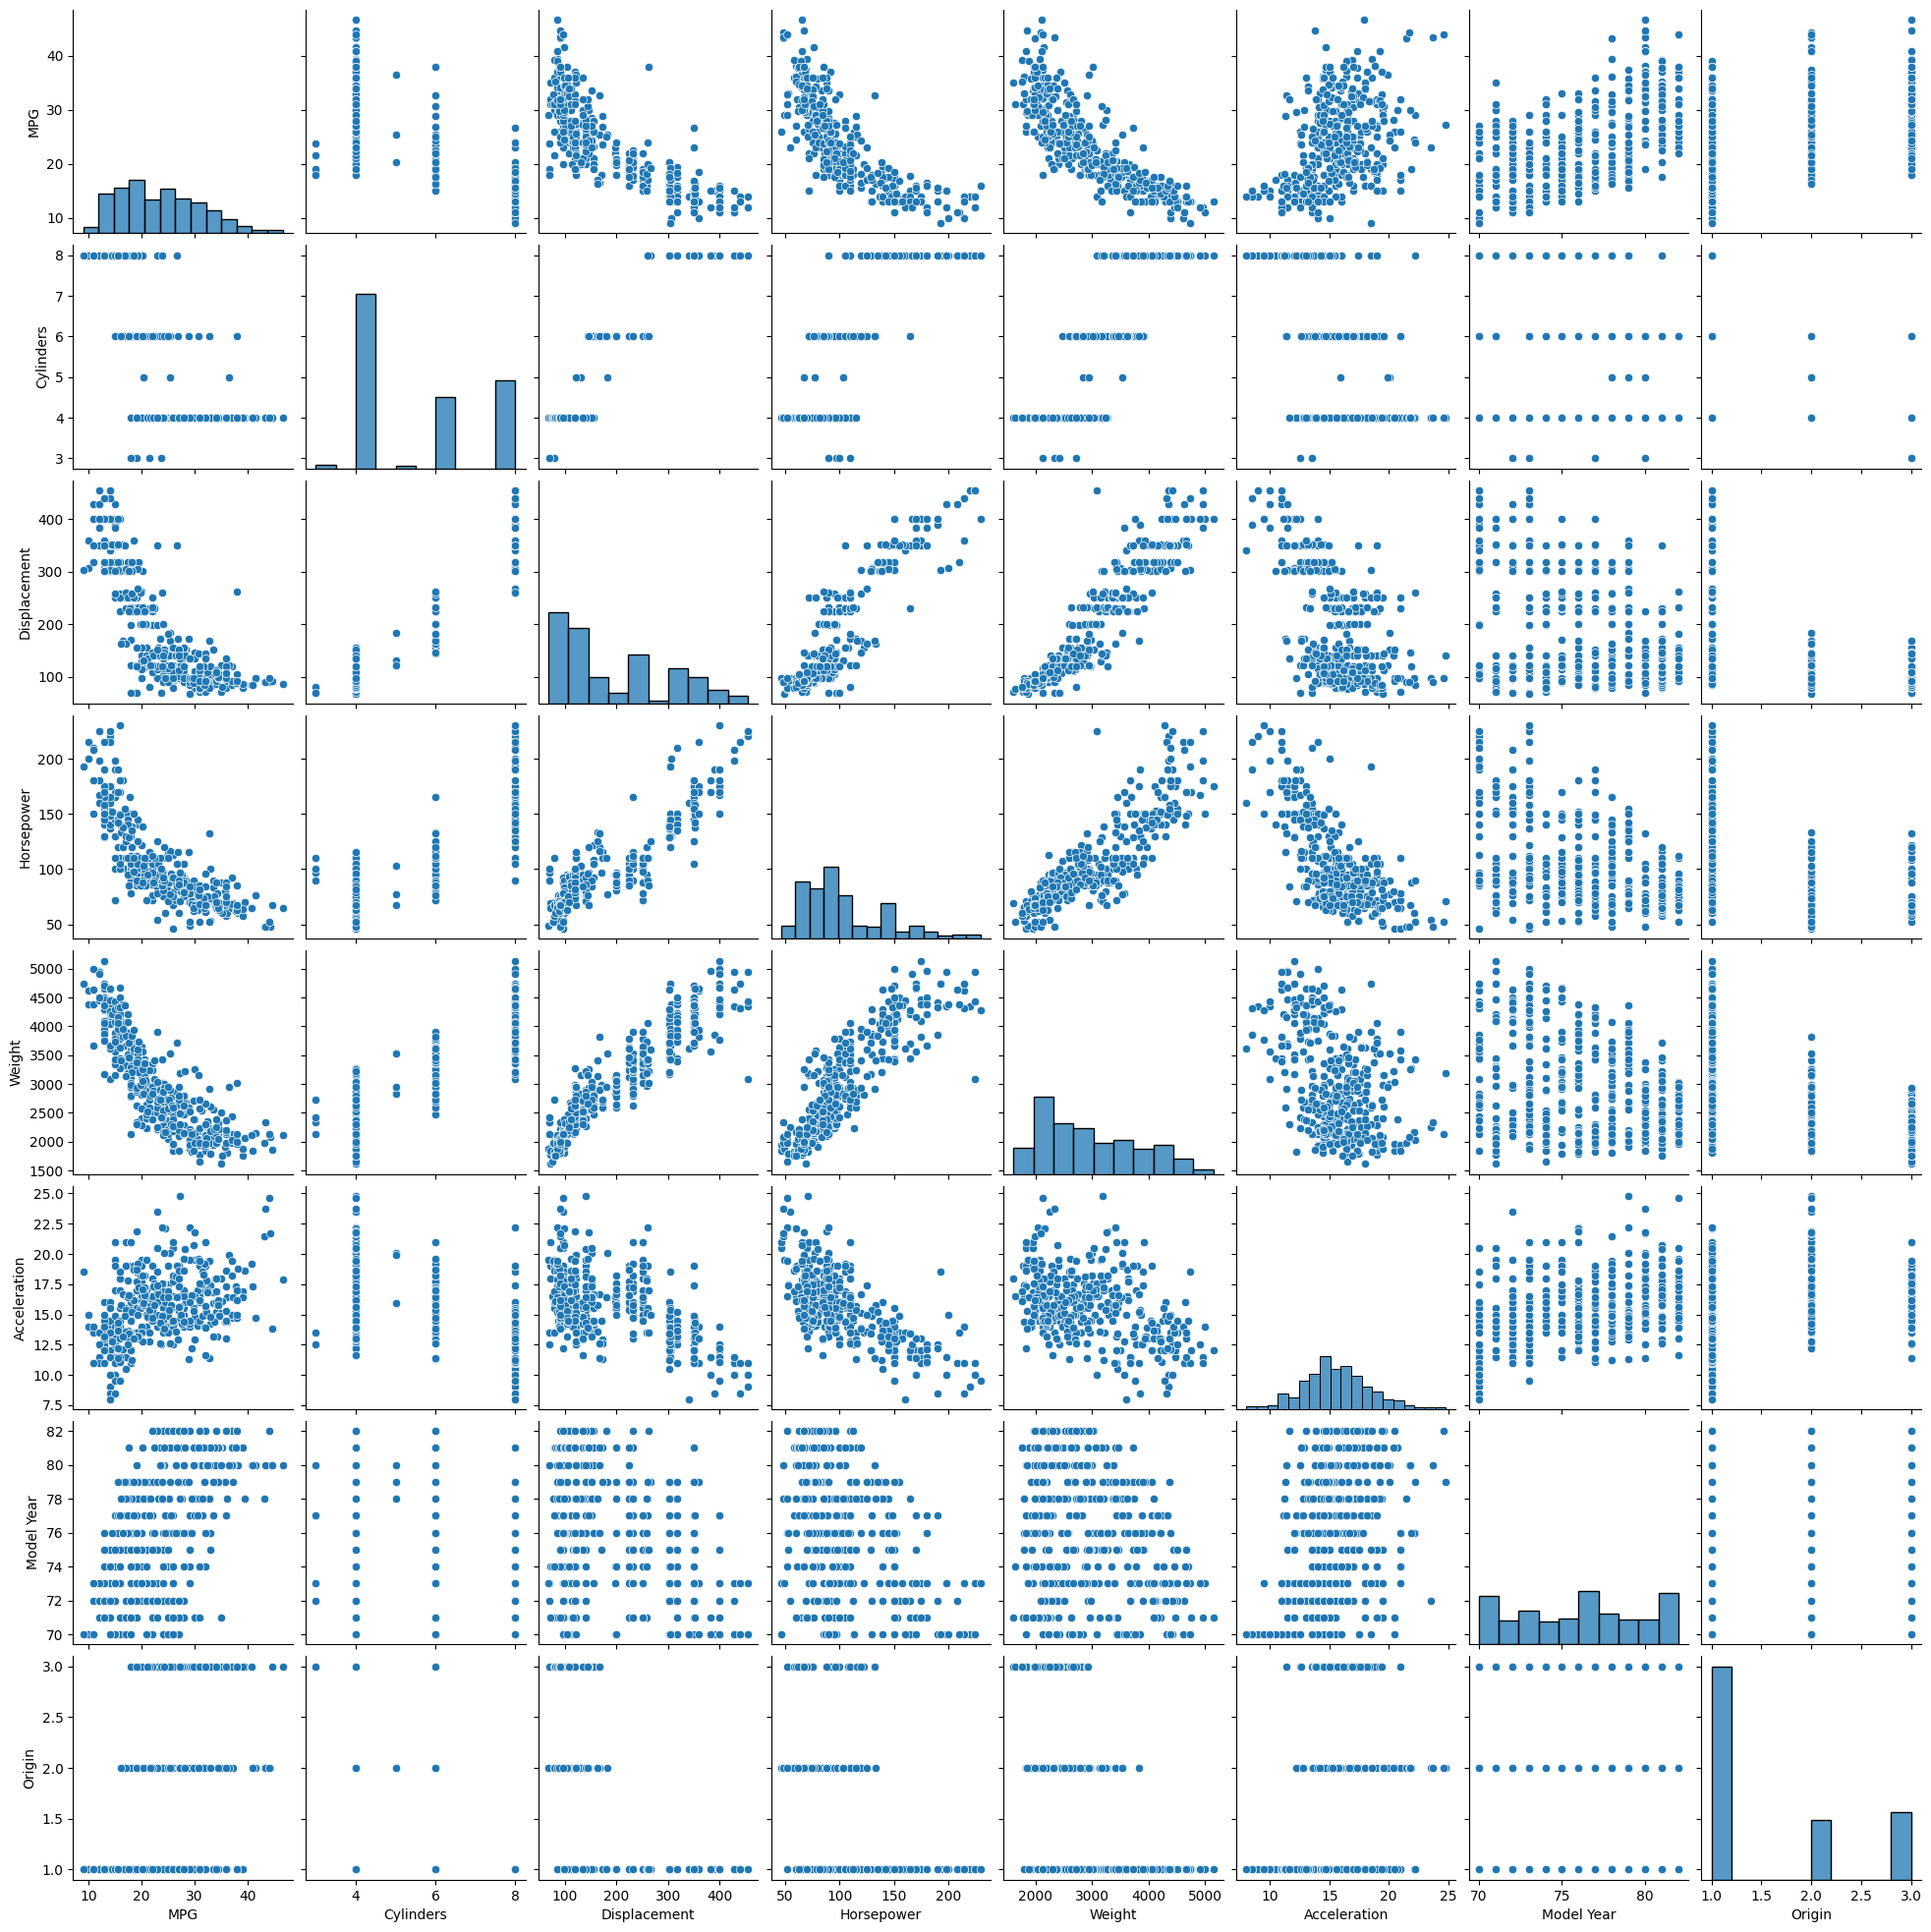

In [11]:
sns.pairplot(df)

In [8]:
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


<Axes: ylabel='Frequency'>

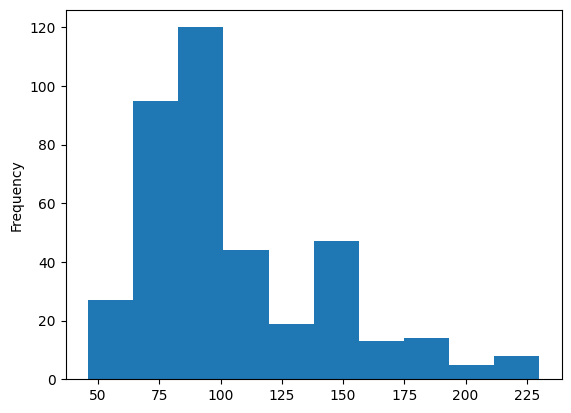

In [9]:
df.Horsepower.plot.hist()

In [18]:
#  fill the nan values
df.Horsepower = df.Horsepower.fillna(df.Horsepower.mean())

<Axes: ylabel='Frequency'>

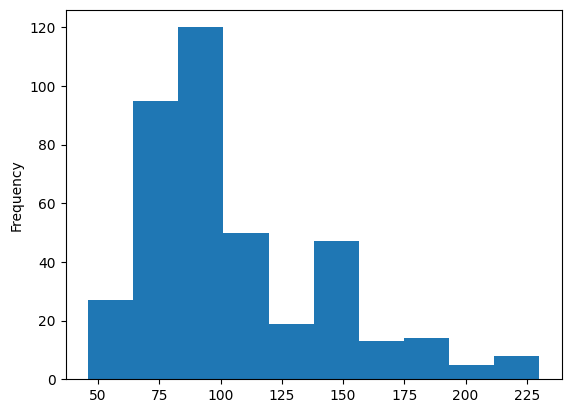

In [19]:
df.Horsepower.plot.hist()

In [24]:
from sklearn.preprocessing import MinMaxScaler
columns = ["Displacement", "Horsepower", "Weight", "Acceleration"]
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [25]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,0.617571,0.456522,0.536150,0.238095,70,1
1,15.0,8,0.728682,0.646739,0.589736,0.208333,70,1
2,18.0,8,0.645995,0.565217,0.516870,0.178571,70,1
3,16.0,8,0.609819,0.565217,0.516019,0.238095,70,1
4,17.0,8,0.604651,0.510870,0.520556,0.148810,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,0.186047,0.217391,0.333711,0.452381,82,1
394,44.0,4,0.074935,0.032609,0.146583,0.988095,82,2
395,32.0,4,0.173127,0.206522,0.193365,0.214286,82,1
396,28.0,4,0.134367,0.179348,0.286929,0.630952,82,1


In [32]:
pip install scikeras[tensorflow-cpu]

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('MPG', axis=1)
y = df['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[6]

In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

def build_model(dense_num=32):
  model = keras.Sequential([
      layers.Dense(dense_num, activation='relu', input_shape=[len(X_train.columns)]),
      layers.Dense(int(dense_num / 2), activation='relu'),
      layers.Dense(int(dense_num / 4), activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
  return model

model = KerasRegressor(build_fn=build_model, verbose=1, epochs=100, batch_size=32)

In [61]:
param_grid = {'model__dense_num': [32, 64, 128]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [62]:
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

best_model = grid_result.best_estimator_

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 886.5004 - mae: 28.0517 
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.4803 - mae: 7.2574  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.2384 - mae: 7.7831 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.0902 - mae: 7.1983 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.1324 - mae: 6.1967  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.2800 - mae: 5.8503  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.8949 - mae: 6.3423  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.8864 - mae: 6.1932  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.8564 - mae: 6.2673  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.0311 - mae: 5.8748
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.7462 - mae: 5.7321 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5856 - mae: 6.2433 
Epoch 13/100
10/10

In [72]:
prediction = best_model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [77]:
grid_result

GridSearchCV(cv=3,
             estimator=KerasRegressor(batch_size=32, build_fn=<function build_model at 0x7a4528e5df30>, epochs=100),
             n_jobs=-1, param_grid={'model__dense_num': [32, 64, 128]})

In [78]:
# evaluate using mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print("MSE: ", mse)

MSE:  9.746784131908061
